# Umbralizado de mínimo error
## J. KITTLERand J. ILLINGWORTH

Imágen Original

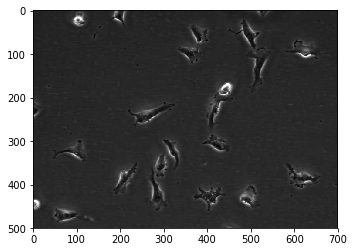

In [55]:
import skimage
from skimage import io
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import img_as_ubyte

filename = './info/celulas/1.jpg'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))

plt.imshow(cel, cmap='gray')
plt.show()

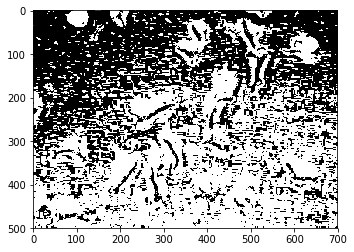

In [56]:
def ubralizaImg(img, T):
    mask = cel > T
    img_u = np.zeros_like(cel)
    img_u[mask] = 255
    return img_u
# evaluación inicial
T = 80
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()

Decicion para categorizar

$ [\frac{g-\mu_1(T)}{\sigma_1(T)}]^2 + 2[log\mu_1(T) - logP_1(T)] > [\frac{g-\mu_2(T)}{\sigma_2(T)}]^2 + 2[log\mu_2(T) - logP_2(T)] \quad g \rightarrow 1 $

In [57]:
from math import sqrt
from math import log
def new_hist_T(p, a, v):
    #-b +- sqrt( pow(b, 2) - 4ac)/ 2
    _a = (1/v[0] - 1/v[1])
    _b = -2 * (a[0]/v[0] - a[1]/v[1])
    _c = 0
    _c += pow(a[0], 2)/v[0] - pow(a[1], 2)/v[1]
    _c += 2*(log(sqrt(v[0])) - log(sqrt(v[1])))
    _c -= 2*(log(p[0]) - log(p[1]))
    
    pos = ( -_b + sqrt( pow(_b, 2) - 4*_a*_c))/(2*_a)
    return pos

def get_params(img, T, mask=None):
    mask = img > T
    mask_i = img < T
    p = (float(img[mask_i].shape[0])/(img.shape[0] * img.shape[1]), float(img[mask].shape[0])/(img.shape[0] * img.shape[1]))
    a = (img[mask_i].mean(), img[mask].mean())
    v = (img[mask_i].var(), img[mask].var())
    return(p,a,v)

def buscaUmbral(img, T):
    new_t = 0
    while( True ):
        new_t = new_hist_T(*get_params(cel, T))
        if int(T) == int(new_t): break
        else: T = int(new_t)
    return int(new_t)

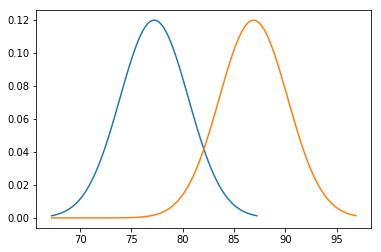

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

params = get_params(cel, T)
# print(params)
mu = params[1][0]
variance = params[2][0]
sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

mu1 = params[1][1]
variance1 = params[2][1]
sigma1 = math.sqrt(variance)

x2 = np.linspace(mu - 3*sigma1, mu1 + 3*sigma1, 100)

plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.plot(x2, mlab.normpdf(x2, mu1, sigma1))


plt.show()

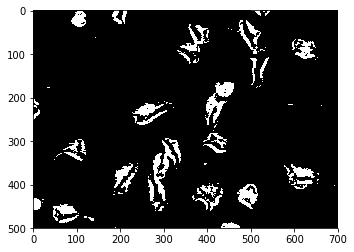

Umbral:  91


In [60]:
T = buscaUmbral(cel, 180)
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()
print('Umbral: ', T)

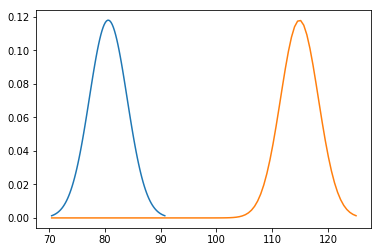

In [61]:
params = get_params(cel, T)
# print(params)
mu = params[1][0]
variance = params[2][0]
sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

mu1 = params[1][1]
variance1 = params[2][1]
sigma1 = math.sqrt(variance)

x2 = np.linspace(mu - 3*sigma1, mu1 + 3*sigma1, 100)

plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.plot(x2, mlab.normpdf(x2, mu1, sigma1))


plt.show()

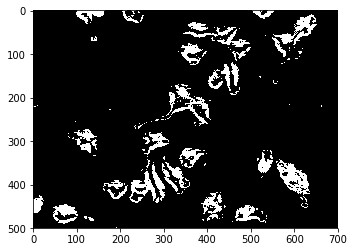

Umbral:  94


In [24]:
filename = './info/celulas/2.jpg'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))
T = buscaUmbral(cel, 180)
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()
print('Umbral: ', T)

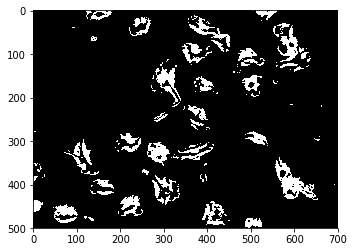

Umbral:  95


In [25]:
filename = './info/celulas/3.jpg'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))
T = buscaUmbral(cel, 180)
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()
print('Umbral: ', T)

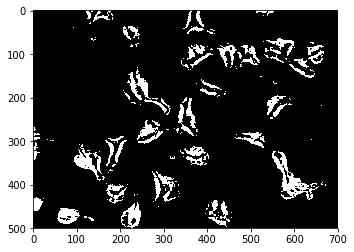

Umbral:  96


In [26]:
filename = './info/celulas/4.jpg'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))
T = buscaUmbral(cel, 180)
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()
print('Umbral: ', T)

/Users/jperalta/miniconda2/envs/py36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


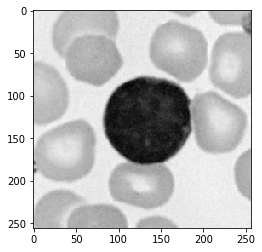

In [37]:
filename = './info/leucocitos/1.png'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))
plt.imshow(cel, cmap='gray')
plt.show()

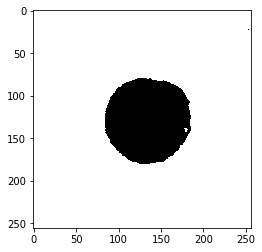

Umbral:  66


In [38]:
T = buscaUmbral(cel, 50)
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()
print('Umbral: ', T)

/Users/jperalta/miniconda2/envs/py36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


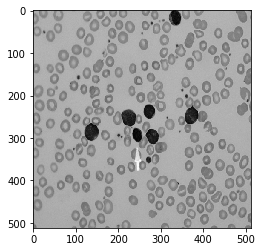

In [42]:
filename = './info/leucocitos/8.jpg'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))
plt.imshow(cel, cmap='gray')
plt.show()

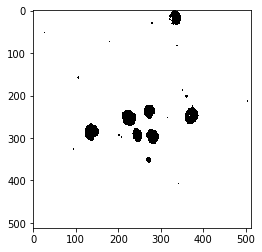

Umbral:  73


In [43]:
T = buscaUmbral(cel, 50)
plt.imshow(ubralizaImg(cel, T), cmap='gray')
plt.show()
print('Umbral: ', T)

/Users/jperalta/miniconda2/envs/py36/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
/Users/jperalta/miniconda2/envs/py36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


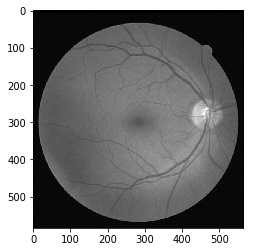

In [122]:
filename = './DRIVE/10 test.tif'
cel = img_as_ubyte(rgb2gray(io.imread(filename)))
plt.imshow(cel, cmap='gray')
plt.show()

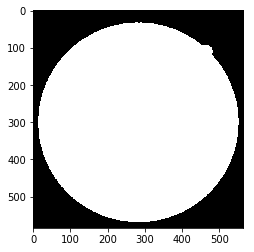

Umbral:  16


In [123]:
T = buscaUmbral(cel, 50)
umb = ubralizaImg(cel, T)
plt.imshow(umb , cmap='gray')
plt.show()
print('Umbral: ', T)

In [124]:
def get_paramsM(img, T, mask=None):
    mask = img > T 
    mask_i = img < T
    if mask is not None:
        mask_b = mask < img
        for i in range(mask_i.shape[0]) :
            for j in range(mask_i.shape[1]) :
                mask_i[i, j] = mask_i[i, j] and mask_b[i, j]
    
    p = (float(img[mask_i].shape[0])/(img.shape[0] * img.shape[1]), float(img[mask].shape[0])/(img.shape[0] * img.shape[1]))
    a = (img[mask_i].mean(), img[mask].mean())
    v = (img[mask_i].var(), img[mask].var())
    return(p,a,v)

get_paramsM(cel, 100, 16)


def buscaUmbralM(img, T, mask=None):
    new_t = 0
    while( True ):
        new_t = new_hist_T(*get_paramsM(cel, T, mask))
        if int(T) == int(new_t): break
        else: T = int(new_t)
    return int(new_t)

ValueError: math domain error